🔹 Kết quả phân loại giọng nam & nữ:
Ngưỡng 1: 102 lần đúng
Ngưỡng 2: 102 lần đúng
Ngưỡng 3: 102 lần đúng
Ngưỡng 4: 102 lần đúng
Ngưỡng 5: 102 lần đúng
Ngưỡng 6: 103 lần đúng
Ngưỡng 7: 103 lần đúng
Ngưỡng 8: 105 lần đúng
Ngưỡng 9: 104 lần đúng
Ngưỡng 10: 104 lần đúng
Ngưỡng 11: 106 lần đúng
Ngưỡng 12: 104 lần đúng
Ngưỡng 13: 114 lần đúng
Ngưỡng 14: 112 lần đúng
Ngưỡng 15: 111 lần đúng
Ngưỡng 16: 116 lần đúng
Ngưỡng 17: 116 lần đúng
Ngưỡng 18: 116 lần đúng
Ngưỡng 19: 117 lần đúng
Ngưỡng 20: 110 lần đúng
Ngưỡng 21: 109 lần đúng
Ngưỡng 22: 107 lần đúng
Ngưỡng 23: 106 lần đúng
Ngưỡng 24: 101 lần đúng
Ngưỡng 25: 102 lần đúng
Ngưỡng 26: 100 lần đúng
Ngưỡng 27: 97 lần đúng
Ngưỡng 28: 99 lần đúng
Ngưỡng 29: 103 lần đúng
Ngưỡng 30: 104 lần đúng
Ngưỡng 31: 102 lần đúng
Ngưỡng 32: 101 lần đúng
Ngưỡng 33: 102 lần đúng
Ngưỡng 34: 102 lần đúng
Ngưỡng 35: 103 lần đúng
Ngưỡng 36: 103 lần đúng
Ngưỡng 37: 105 lần đúng
Ngưỡng 38: 106 lần đúng
Ngưỡng 39: 105 lần đúng
Ngưỡng 40: 103 lần đúng
Ngưỡng 41: 102 

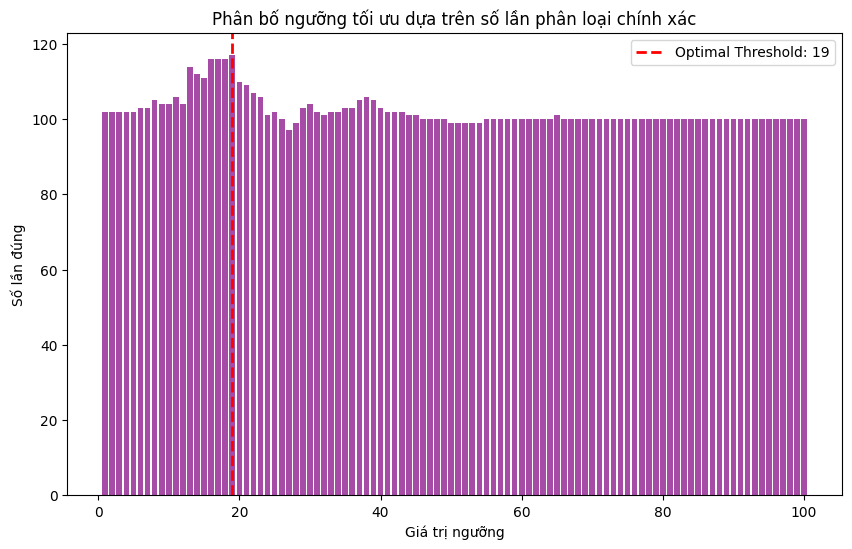

🔹 Ngưỡng tối ưu được tìm thấy: 19


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from app.algorithms import analyze_new_audio  # Import the function from your algorithms.py

def find_optimal_threshold(male_dir, female_dir):
    """
    Tìm giá trị ngưỡng tối ưu để phân loại giọng nam và nữ bằng cách kiểm tra tất cả các ngưỡng từ 1 - 100.

    - male_dir: Đường dẫn chứa file âm thanh giọng nam
    - female_dir: Đường dẫn chứa file âm thanh giọng nữ

    Trả về:
    - Ngưỡng tối ưu được tìm thấy
    - Biểu đồ phân bố số lần Spectral Flux vượt ngưỡng cho từng giới tính
    """
    threshold_counts = Counter()
    thresholds_range = range(1, 101)  # Kiểm tra từ ngưỡng 1 đến 100

    # Duyệt qua các file giọng nam
    for file in os.listdir(male_dir):
        if file.endswith(".wav"):
            file_path = os.path.join(male_dir, file)
            for threshold in thresholds_range:
                label, _ = analyze_new_audio(file_path, threshold)
                if label == "Male":
                    threshold_counts[threshold] += 1  # Tăng số lần đúng của ngưỡng này

    # Duyệt qua các file giọng nữ
    for file in os.listdir(female_dir):
        if file.endswith(".wav"):
            file_path = os.path.join(female_dir, file)
            for threshold in thresholds_range:
                label, _ = analyze_new_audio(file_path, threshold)
                if label == "Female":
                    threshold_counts[threshold] += 1  # Tăng số lần đúng của ngưỡng này

    # In kết quả của từng bộ dữ liệu
    print("🔹 Kết quả phân loại giọng nam & nữ:")
    for threshold, count in sorted(threshold_counts.items()):
        print(f"Ngưỡng {threshold}: {count} lần đúng")

    # Tìm ngưỡng phổ biến nhất (có nhiều lần đúng nhất)
    best_threshold = max(threshold_counts, key=threshold_counts.get)

    # Vẽ biểu đồ
    plt.figure(figsize=(10, 6))
    plt.bar(threshold_counts.keys(), threshold_counts.values(), color='purple', alpha=0.7)
    plt.axvline(best_threshold, color='red', linestyle='dashed', linewidth=2, label=f'Optimal Threshold: {best_threshold}')
    plt.xlabel("Giá trị ngưỡng")
    plt.ylabel("Số lần đúng")
    plt.title("Phân bố ngưỡng tối ưu dựa trên số lần phân loại chính xác")
    plt.legend()
    plt.show()

    print(f"🔹 Ngưỡng tối ưu được tìm thấy: {best_threshold}")
    return best_threshold

# Chạy hàm với thư mục dữ liệu
best_threshold = find_optimal_threshold("males", "females")